<center>МІНІСТЕРСТВО ОСВІТИ І НАУКИ УКРАЇНИ
<center>НАЦІОНАЛЬНИЙ ТЕХНІЧНИЙ УНІВЕРСИТЕТ УКРАЇНИ
<center>"КИЇВСЬКИЙ ПОЛІТЕХНІЧНИЙ ІНСТИТУТ імені Ігоря Сікорського"
<center>Кафедра біомедичної інженерії

<cener>Компʼютерний практикум №4

<center>з дисципліни "Обробка та аналіз біомедичних даних"


<right>виконала:
<br>
<right>студентка групи БС-12
<br>
<right>Сипко В.І
<center>Київ-2023

In [2]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt


1.   Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.

In [14]:
mu = [5, 10, -3]
sigma = [1, 2, 2]

norm_data_1 = np.random.normal(mu[0], sigma[0], 20)
norm_data_2 = np.random.normal(mu[1], sigma[1], 20)
norm_data_3 = np.random.normal(mu[2], sigma[2], 20)

log_data_1 = np.random.lognormal(5, 1, 20)
log_data_2 = np.random.lognormal(10, 1, 20)
log_data_3 = np.random.lognormal(0, 2, 20)

2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.

In [5]:
table_5 = pd.read_excel('/content/5 - Coeficients for the W test for normality.xlsx')
table_5.head()

,i\n,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,1,0.7071,0.7071,0.6872,0.6646,0.6431,0.6233,0.6052,0.5888,0.5739,...,0.3940,0.3917,0.3894,0.3872,0.3850,0.3830,0.3808,0.3789,0.3770,0.3751
1,2,NaN,NaN,0.1677,0.2413,0.2806,0.3031,0.3164,0.3244,0.3291,...,0.2719,0.2701,0.2684,0.2667,0.2651,0.2635,0.2620,0.2604,0.2589,0.2574
2,3,NaN,NaN,NaN,NaN,0.0875,0.1401,0.1743,0.1976,0.2141,...,0.2357,0.2345,0.2334,0.2323,0.2313,0.2302,0.2291,0.2281,0.2271,0.2260
3,4,NaN,NaN,NaN,NaN,NaN,NaN,0.0561,0.0947,0.1224,...,0.2091,0.2085,0.2078,0.2072,0.2065,0.2058,0.2052,0.2045,0.2038,0.2032
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0399,...,0.1876,0.1874,0.1871,0.1868,0.1865,0.1862,0.1859,0.1855,0.1851,0.1847


In [6]:
table_6 = pd.read_excel('/content/6 - Ð oints of the distribution of W.xlsx')
table_6.head()

,n,0-5
0,3,0.767
1,4,0.748
2,5,0.762
3,6,0.788
4,7,0.803


In [7]:
def shapiro_wilk(data):
  data = np.sort(data)
  coeffs = table_5[len(data)].dropna()

  S_2 = sum(x**2 for x in data) - (1/len(data))*(sum(x for x in data))**2

  B_2 = 0
  for i in range(0, int((len(data) + 1)/2)):
    B_2 += table_5[len(data)][i] * (data[len(data) - i - 1] - data[i])

  return(round((B_2**2/S_2), 4))

In [15]:
shapiro_wilk(norm_data_1)

0.942

In [16]:
shapiro_wilk(norm_data_2)

0.9522

In [17]:
shapiro_wilk(norm_data_3)

0.9449

In [18]:
shapiro_wilk(log_data_1)

0.6244

In [19]:
shapiro_wilk(log_data_2)

0.7958

In [20]:
shapiro_wilk(log_data_3)

0.5888

3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 4. Назва стовпчиків - Variable,	Statistics,	W-value	Distribution.
4. Занести в стовпчик Variable назви змінних.
5. Занести в стовпчик W-value, Distribution результати роботи критерію Шапіро-Уілка. Додати до таблиці значення розрахунку критерію, та користуючись таблицями. 
6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].
7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

In [21]:
variables = ['norm_data_1', 'norm_data_2', 'norm_data_3', 'log_data_1', 'log_data_2', 'log_data_3']
distributions = ['Normal']*3 + ['Logarithmic']*3
arr_variables = [norm_data_1, norm_data_2, norm_data_3, log_data_1, log_data_2, log_data_3]

df = pd.DataFrame(columns=['Variable', 'Statistics', 'W-value', 'Distribution'], index=range(1, len(variables)+1))

df['Variable'] = variables
df['Distribution'] = distributions
df['W-value'] = list(map(shapiro_wilk, arr_variables))
df['Statistics'][0:3] = list(map(lambda x, y: f'{x}[{y}]', mu, sigma))
df['Statistics'][3:len(variables)+1] = list(map(lambda x: f'{round((np.quantile(x, 0.5)), 1)}[{round((np.quantile(x, 0.5)), 1)}; {round((np.quantile(x, 0.5)), 1)}]', arr_variables[3: len(variables)+1]))
df

<ipython-input-21-1005a4a32888>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Statistics'][0:3] = list(map(lambda x, y: f'{x}[{y}]', mu, sigma))
<ipython-input-21-1005a4a32888>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Statistics'][3:len(variables)+1] = list(map(lambda x: f'{round((np.quantile(x, 0.5)), 1)}[{round((np.quantile(x, 0.5)), 1)}; {round((np.quantile(x, 0.5)), 1)}]', arr_variables[3: len(variables)+1]))


,Variable,Statistics,W-value,Distribution
1,norm_data_1,5[1],0.9420,Normal
2,norm_data_2,10[2],0.9522,Normal
3,norm_data_3,-3[2],0.9449,Normal
4,log_data_1,241.4[241.4; 241.4],0.6244,Logarithmic
5,log_data_2,21671.2[21671.2; 21671.2],0.7958,Logarithmic
6,log_data_3,0.8[0.8; 0.8],0.5888,Logarithmic


8. Для кожної змінної створити графік розподілення, який візуально зобразить розподіл даних.

<ipython-input-22-446f5b0def52>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(ax=axes[0, i], data = arr_variables[i], shade=True)
<ipython-input-22-446f5b0def52>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(ax=axes[0, i], data = arr_variables[i], shade=True)
<ipython-input-22-446f5b0def52>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(ax=axes[0, i], data = arr_variables[i], shade=True)
<ipython-input-22-446f5b0def52>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(

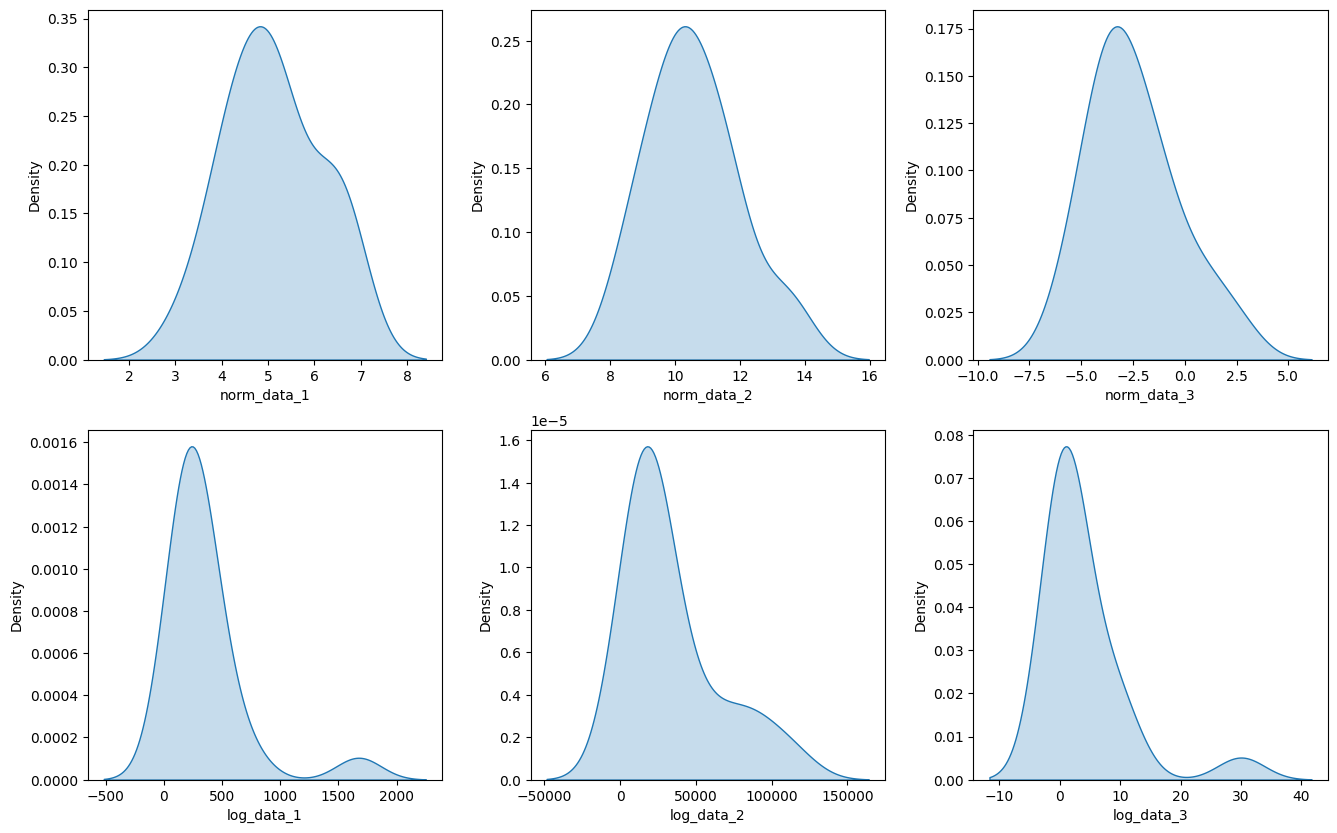

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
for i in range(0, int(len(arr_variables)/2)):
  kde = sns.kdeplot(ax=axes[0, i], data = arr_variables[i], shade=True)
  kde.set(xlabel=variables[i])
for i in range(int(len(arr_variables)/2), len(arr_variables)):
  kde = sns.kdeplot(ax = axes[1, i - int(len(variables) / 2)], data = arr_variables[i], shade=True)
  kde.set(xlabel=variables[i])
plt.subplots_adjust(wspace = 0.25)